# Part II - Ford GoBike System Data Exploration
## by Ayooluwa Jesuniyi

## Investigation Overview

> In this investigation, I took a look at how the duration of trips changes with respect to customer type. The main focus was on hours of the day, days of the week and customer type.

## Dataset Overview

> The dataset being used for this project is the Ford GoBike System Dataset, provided by Udacity. This dataset contains information of a bike-sharing system of approximately 183,412 rides and 16 features. The data covered the greater San Francisco Bay area in 2019. Most variables are qualitative and some are categorical in nature.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike_clean = pd.read_csv('cleaned_201902-fordgobike-tripdata.csv')

In [3]:
# convert into ordered categorical types
ordinal_var_dict = {'user_type': ['Subscriber','Customer'],
                    'member_gender': ['Male', 'Female', 'Other'],
                    'bike_share_for_all_trip': ['No', 'Yes'],
                   'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                   'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                   'time_of_day': ['Late Night', 'Early Morning','Morning','Noon','Evening','Night'],
                   'age_category': ['21-25','26-30', '31-35', '36-40', '41-45', '46-50', '51-55','56-60']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    gobike_clean[var] = gobike_clean[var].astype(ordered_var)

## Insight On Type of Users

> The subscribers constitue a large proportion of the type of users in the data


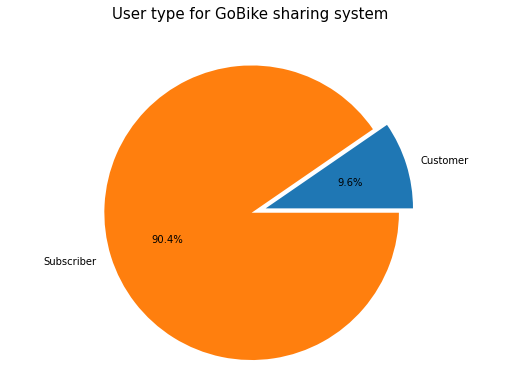

In [4]:
# calculating for the proportion for each type with the total users

subscriber_count = gobike_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_count = gobike_clean.query('user_type == "Customer"')['bike_id'].count()

subscriber_prop = (subscriber_count / gobike_clean['bike_id'].count()) *100
customer_prop = (customer_count / gobike_clean['bike_id'].count()) *100

# This code will display the proportion of each type in pie chart
plt.figure(figsize = [9, 6])
l_type = ['Customer', 'Subscriber']
sizes_type = [customer_prop, subscriber_prop]
plt.pie(sizes_type, explode=(0, 0.1), labels=l_type,autopct='%1.1f%%')
plt.axis('equal');

# plot heading 
plt.suptitle('User type for GoBike sharing system', fontsize=15);

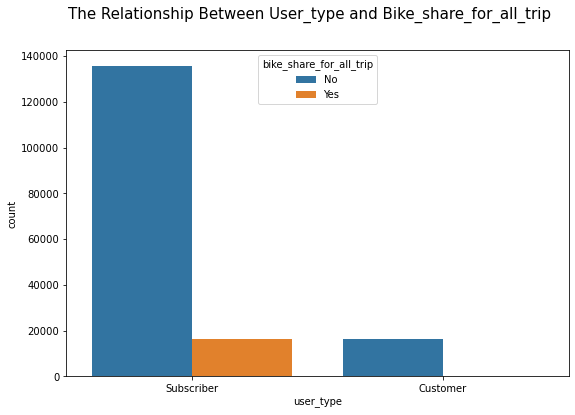

In [5]:
# def function for bivariate plots to be used later in exploration
def bi_plot(a, b, c, d, e):
    plt.figure(figsize = [a, b])
    sb.countplot(data = gobike_clean, x = c, hue = d);
    # plot heading
    plt.suptitle(e, fontsize=15);

# ploting to check the total of each user type under bike_share_for_all_trip
bi_plot(9, 6, 'user_type', 'bike_share_for_all_trip', 'The Relationship Between User_type and Bike_share_for_all_trip')

## Insight On Gender of Riders

> The population of riders is dominated by the male gender, while the female riders have a lower average age distribution compared to other genders.

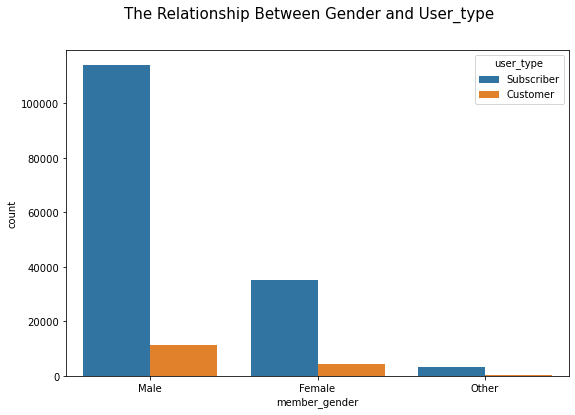

In [6]:
# ploting to check the total of each type of users under each gender
bi_plot(9, 6, 'member_gender', 'user_type', 'The Relationship Between Gender and User_type')

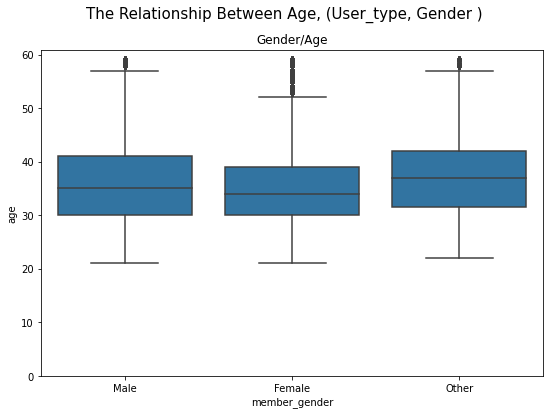

In [7]:
# box plot showing the relationship between the gender and age of users
plt.figure(figsize = [9, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data=gobike_clean, x='member_gender', y='age', color=base_color);
plt.ylim(ymin=0)
plt.title('Gender/Age');

# plot heading
plt.suptitle('The Relationship Between Age, (User_type, Gender )', fontsize=15);

## Correlation Between Period of Day and Bike Share

> The high frequency in rides in the morning and evening can be linked to rush hours where employees and students leave for work and school and come back later in the evening. Also saw a correlation between the duration of rides and days of the rides.

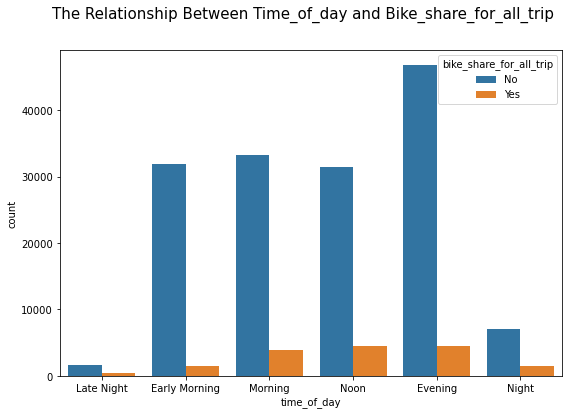

In [8]:
# ploting to check the total of each time of the day under bike_share_for_all_trip
bi_plot(9, 6, 'time_of_day', 'bike_share_for_all_trip', 'The Relationship Between Time_of_day and Bike_share_for_all_trip')

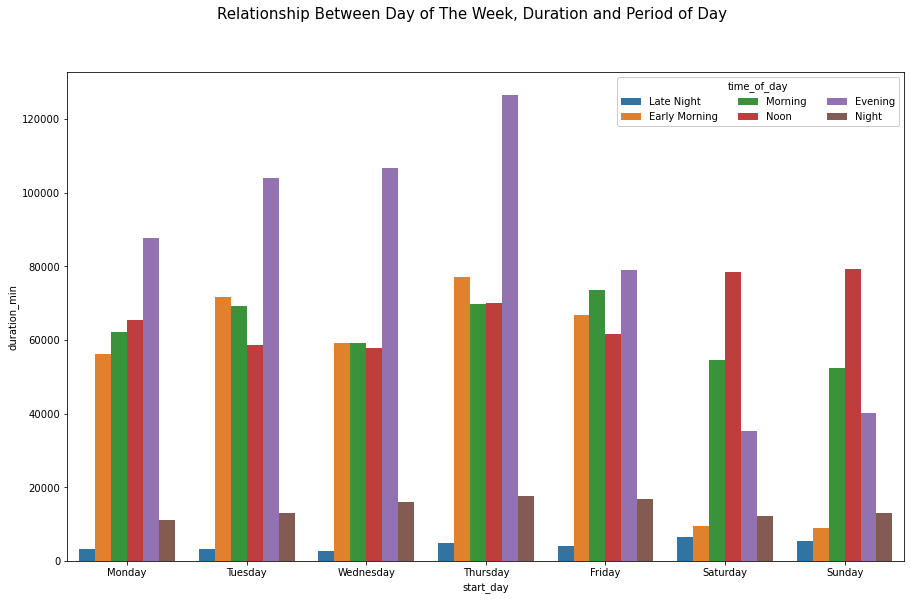

In [9]:
# futher investigation on the relationship between day of week, duration and period of day
plt.figure(figsize = [15,9])
ax = sb.barplot(data = gobike_clean, x = 'start_day', y = 'duration_min', hue = 'time_of_day', estimator = sum, ci=None);
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'time_of_day');

# plot heading
plt.suptitle('Relationship Between Day of The Week, Duration and Period of Day', fontsize=15);

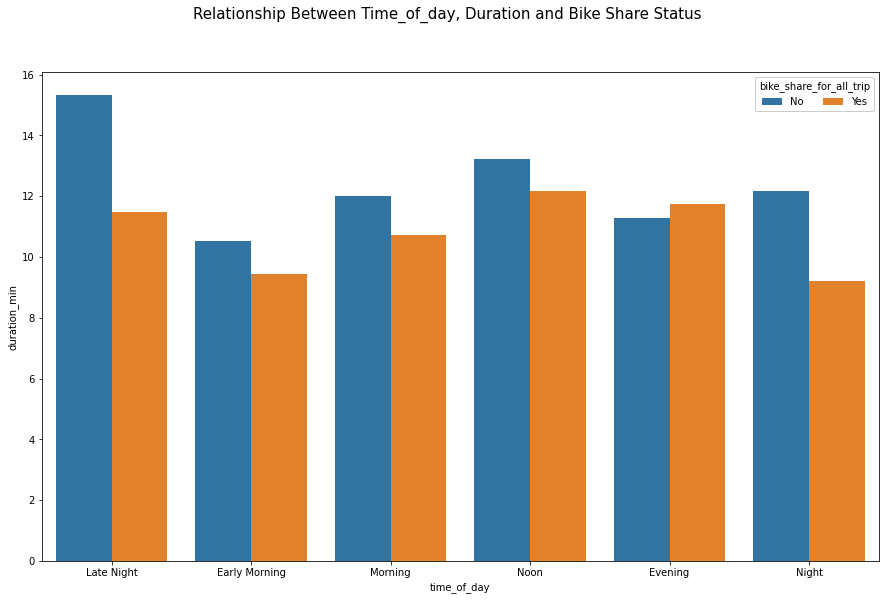

In [10]:
# futher investigation on the relationship between period of the day, duration and bike share status
plt.figure(figsize = [15,9])
ax = sb.barplot(data = gobike_clean, x = 'time_of_day', y = 'duration_min', hue = 'bike_share_for_all_trip', ci=None);
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip');

# plot heading
plt.suptitle('Relationship Between Time_of_day, Duration and Bike Share Status', fontsize=15);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Ford_GoBike_Data_Exploration.ipynb --to slides --post serve --no-input --no-prompt